[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.
Processed a batch of 2 passwords, total distances computed: 49818
Processed a batch of 5 passwords, total distances computed: 49828
Processed a batch of 2 passwords, total distances computed: 49829
Processed a batch of 5 passwords, total distances computed: 49839
Processed a batch of 10 passwords, total distances computed: 49884
Processed a batch of 1 passwords, total distances computed: 49884
Processed a batch of 3 passwords, total distances computed: 49887
Processed a batch of 7 passwords, total distances computed: 49908
Processed a batch of 6 passwords, total distances computed: 49923
Processed a batch of 6 passwords, total distances computed: 49938
Processed a batch of 2 passwords, total distances computed: 49939
Processed a batch of 5 passwords, total distances computed: 49949
Processed a batch of 5 passwords, total distances computed: 49959
Processed a batch of 2 passwords, total distances computed: 49960
Processed a batch of 2 p

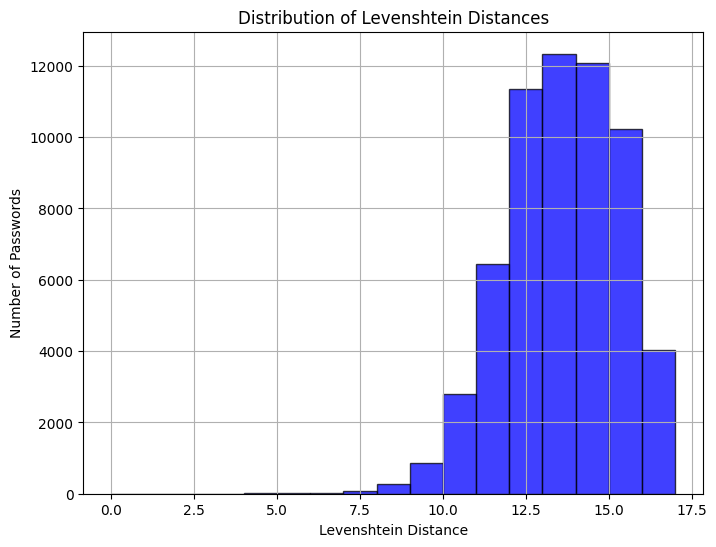

In [8]:

!pip install nltk seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.metrics import edit_distance
import nltk
nltk.download('punkt')

#filter passwords based on length and ASCII characters
def filter_passwords(password_list):
    filtered = [pwd for pwd in password_list if 5 <= len(pwd) <= 17 and pwd.isascii()]
    return list(set(filtered))  # Remove duplicates

#load passwords in batches
def load_passwords(filename, batch_size=100000):
    with open(filename, 'r', encoding='latin-1') as f:
        batch = []
        for line in f:
            batch.append(line.strip())
            if len(batch) == batch_size:
                yield filter_passwords(batch)
                batch = []
        if batch:
            yield filter_passwords(batch)

#compute Levenshtein distances for a batch of passwords
def compute_levenshtein_distances(password_batch):
    num_passwords = len(password_batch)
    distances = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):  #only upper triangle to save space
            dist = edit_distance(password_batch[i], password_batch[j])
            distances.append(dist)
    return distances

#load and process the dataset in chunks
password_file = 'version_1.txt'  # Path to the password dataset

#initialize an empty list to store all distances
all_distances = []

#process the dataset in batches
for batch in load_passwords(password_file, batch_size=5000):
    batch_distances = compute_levenshtein_distances(batch)
    all_distances.extend(batch_distances)
    print(f"Processed a batch of {len(batch)} passwords, total distances computed: {len(all_distances)}")

#plot the distribution of Levenshtein distances as a histogram
plt.figure(figsize=(8, 6))
plt.hist(all_distances, bins=range(18), alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Levenshtein Distances')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Number of Passwords')
plt.grid(True)
plt.show()

# #plot the distribution of Levenshtein distances as a histogram
# plt.figure(figsize=(8, 6))

# #plot histogram with custom bins and ticks
# plt.hist(all_distances, bins=range(18), alpha=0.75, color='blue', edgecolor='black')
# plt.title('Distribution of Levenshtein Distances')
# plt.xlabel('Levenshtein Distance')
# plt.ylabel('Number of Passwords')

# #set custom x-axis ticks (0, 2, 4, 6, ..., 16)
# plt.xticks([0, 2, 4, 6, 8, 10, 14, 16])

# #set y-axis to use a linear scale from 0 to a max value based on your data
# plt.ylim(0, 10**6)
# plt.yticks(np.arange(0, 10**6 + 1, step=10**5))  # Linear ticks from 0 to 1 million

# #add gridlines for better readability
# plt.grid(True, which="both", ls="--")

# # Show the plot
# plt.show()


